### Paola Della Foglia matr. 961014

# <span style="color:red"> Esercitazione numerica 9</span>

## <span style="color:blue"> Esercizio 9.1</span>
### Introduzione

#### Il problema del commesso viaggiatore

L'idea alla base di questo esercizio è quello di applicare un **algoritmo genetico** al problema del commesso viaggiatore: egli deve visitare un certo numero di città una sola volta partendo dalla sua città di origine e ritornando alla sua stessa città alla fine del percorso.
L'obiettivo è quello di percorrere il cammino più corto possibile.

Consideriamo una sequenza ordinata di città , $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, che vanno dalla città 1 all'n-esima città. La funzione che ci occorre per minimizzare il percorso può essere una norma 
$$
L^{(2)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|^2
$$
o
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$

(con $\vec{x}_{N+1}=\vec{x}_1$) è una particolare permutazione, P, della sequenza ordinata di città $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e. 

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Per scrivere il percorso possiamo usufruire di vari tipi di rappresentazione. Ad esempio, per cinque città, il cammino può essere rappresentato dal vettore seguente:
$$
\left[ 1, 3, 5, 4, 2 \right]
$$

    

ciò significa partire dalla prima città, visitare la terza, poi la quinta poi la quarta e infine la seconda e poi ritono a quella di partenza.

**In alternativa**, possiamo esprimere il percorso attraverso la configurazione di un modello Ising 2D, di variabili discrete a valori 1 (spin-up) 0 (spin-down) oppure 1 (spin-up) -1 (spin-down), tramite un reticolo $N\times N$, dove N è il numero di città. 

La configurazione del reticolo deve soddisfare i seguenti vincoli:
    1. ogni riga deve contenere al massimo uno spin-up e tutti gli altri spin-down
    2. idem come sopra per le colonne
    
$$
\begin{bmatrix}
1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1\\
0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0\\
0 & 0 & 1 & 0 & 0\\
\end{bmatrix}
$$


La matrice sovrastante può essere interpretata nel modo seguente:
- le colonne rappresentano il tempo di visita: prima colonna = prima visita, etc.
- le righe rappresentano la sequenza ordinata di città: prima riga = prima città, terza riga= terza città etc.


La matrice precedente si riferisce quindi alla sequenza seguente :
    
$$
\vec{x}_1, \vec{x}_2, \vec{x}_3, \vec{x}_4, \vec{x}_5 = 
\vec{c}_{1}, \vec{c}_{3}, \vec{c}_{5}, \vec{c}_{4}, \vec{c}_{2}
$$

e allora la lunghezza del percorso corrisponde a queste due quantità:
    
$$
L^{(2)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3|^2 + |\vec{c}_3-\vec{c}_5|^2 + |\vec{c}_5-\vec{c}_4|^2 +
|\vec{c}_4-\vec{c}_2|^2 + |\vec{c}_2-\vec{c}_1|^2
$$

o
$$
L^{(1)}(\vec{x}_1, \dots, \vec{x}_5) = 
|\vec{c}_1-\vec{c}_3| + |\vec{c}_3-\vec{c}_5| + |\vec{c}_5-\vec{c}_4| +
|\vec{c}_4-\vec{c}_2| + |\vec{c}_2-\vec{c}_1|
$$

### Scopo
Lo scopo dell'esercizio è di risolvere il problema del commesso viaggiatore implementando un **algoritmo genetico** in c++ per 32 città disposte su un cerchio o all'interno di un quadrato.

Per risolvere il problema abbiamo creato un vettore di classe "City" che memorizza la posizione di una città, il vettore contiene quindi la posizione di tutte le città che stiamo considerando e una classe "Percorso" che contiene un singolo percorso. 
I membri privati della classe "Percorso" sono dei vettori di int, in cui abbiamo memorizzato l'indice della città i-esima e un double contenente la lunghezza del percorso.
La prima volta che lanciamo il programma con il comando <font face = "Courier"> `$./main.exe` </font>, vengono generate casualmente (tramite l'algoritmo 'random.cpp') le posizioni delle città (su di un cerchio o all'interno di un quadrato). Tali posizioni sono salvate rispettivamente nei files 'cities_cerchio.0' e 'cities_quadrato.0'.

Cerco di realizzare un algoritmo genetico seguendo degli steps standard:
    
    1- Occorre generare una popolazione: nel nostro caso dobbiamo operare con n=32 città, quindi la popolazione deve contenere almeno n^2=1024 individui. Ogni elemento della popolazione è rappresentato da un percorso casuale con n! possibilità , ordiniamo poi la popolazione in base alla lunghezza dei percorsi tramite una 'quicksort' (algoritmo di ordinamento rapido).
        
    2- Algoritmo genetico: selezioniamo due individui genitori, con una probabilità del 50% eseguiamo il crossover altrimenti li mettiamo nella seconda generazione così come sono. I percorsi sono selezionati in modo casuale ma non sono estratti da una distribuzione uniforme (è più probabile che vengano scelti i percorsi più brevi). Dopo il crossover, per aumentare la diversità può succedere una mutazione casuale, abbiamo introdotto 5 diversi tipi di mutazioni ognuna delle quali si verifica con una probabilità di 10%. Dopodichè ordiniamo i percorsi ottenuti e procediamo con un nuovo crossover.
    

Abbiamo utilizzato un metodo elitario, quindi il percorso migliore della generazione viene inserito in quello successivo senza incrociarlo con un altro genitore e senza mutazioni.
Non è necessario usufruire di un tale metodo, però, in questo caso, ha contribuito alla convergenza. Può accadere infatti che in una generazione riusciamo a trovare il percorso migliore (il più breve possibile) ma poi lo perdiamo in quella successiva, fino a ritrovarlo dopo un crossover o una mutazione casuale.

Descriviamo ora le cinque mutazioni implementate nel codice:
1. permutazione di coppia di città, ad es. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 2, 4, 3, 5 \right]$ (A questo punto dovresti già avere tale operatore ... come hai generato la popolazione di partenza?).
2. spostamento della posizione di $+n$ per ogni città nel percorso (questa mutazione non cambia la lunghezza del percorso ma potrebbe essere utile per l'ergodicità), ad es. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 4, 5, 1, 2, 3 \right] $ per uno shift di $+2$.
3. spostamento delle posizioni $+n$ per $m$ città contigue (data la presenza dell'operatore precedente, è possibile evitare mutazioni che richiedono l'utilizzo di condizioni al contorno periodiche), ad es. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 5, 2, 3 \right] $ per uno shift di $+2$ shift dalla seconda alla terza città.
4. permutazione tra $m$ città contigue con altre diverse $m$ città contigue ($m<N/2$), ad es. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 4, 5, 3, 1, 2 \right] $ per una permutazione delle prime 2 città con le ultime 2.
5. inversione dell'ordine in cui le $m$ città compaiono nel percorso ($m \le N$), ad es. $\left[ 1, 2, 3, 4, 5 \right] \to \left[ 1, 4, 3, 2, 5 \right]$ inversione dalla città 2 alla 4.

L'operatore crossover lavora nel modo seguente:
                                                                    
dati una madre e un padre selezionati, ad es.
                                                                    
$$
\left[ 1, 2, 3, 4, 5 \right]\\
\left[ 1, 5, 4, 3, 2 \right] 
$$                                                                    
1. Taglia i percorsi alla medesima posizione:
                                                                    
$$
\left[ 1, 2, 3 | 4, 5 \right]\\
\left[ 1, 5, 4 | 3, 2 \right] 
$$
2. Conserva la prima parte dei percorsi:
                                                                    
$$
\left[ 1, 2, 3 | X, Y \right]\\
\left[ 1, 5, 4 | X, Y \right] 
$$
3. Completare i percorsi con le città mancanti aggiungendole nell'**ordine** in cui compaiono nella consorte:
                                                                    
$$
\left[ 1, 2, 3 | 5, 4 \right]\\
\left[ 1, 5, 4 | 2, 3 \right] 
$$

### Compilazione
Il codice è salvato nella cartella <font face = "Courier"> ex9 </font>. Se vogliamo utilizzare la libreria Armadillo possiamo compilare il codice, da shell unix, usando il comando <font face = "Courier"> `$make -larmadillo` </font> ed eseguirlo con <font face = "Courier"> `$./main.exe` </font>. 
Esso legge le posizioni delle città salvate nel file 'cities.0' (se non c'è questo file le città vengono generate casualmente) e produce tre file come output: la lunghezza media della migliore metà di popolazione (ossia la lunghezza media dei percorsi più brevi) in funzione delle generazioni ('MeanPath.dat'), la lunghezza dei percorsi più brevi in funzione delle generazioni ('Smallest.dat') e il percorso migliore dell'ultima generazione (ossia il percorso più breve, 'cities.final').


### Cerchio
Consideriamo il caso in cui le città siano disposte lungo una circonferenza: produciamo le città

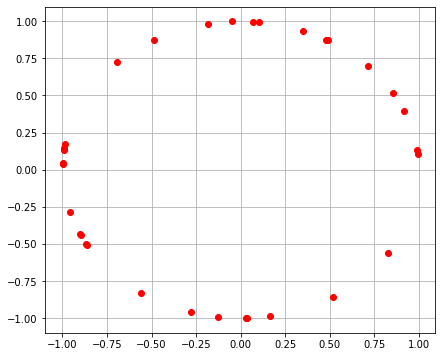

In [15]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/cities_cerchio.0", usecols=(1,2), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro')
plt.grid(True)
plt.show()

e dopo 900 generazioni il percorso migliore è:

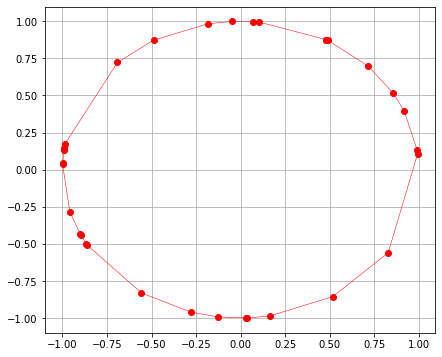

In [16]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/cities_cerchio.final", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro',linestyle='-', lw=0.5)
plt.grid(True)
plt.show()

Dal grafico sovrastante capiamo che l'algoritmo genetico che abbiamo implementato funziona bene. E' molto semplice capire qual è il percorso più breve in questo caso.

Sotto plottiamo invece rispettivamente la lunghezza dei percorsi più brevi in funzione delle generazioni (file 'SmallestPath_cerchio.dat') e il valor medio della lunghezza dei percorsi più brevi in funzione delle generazioni (file 'MeanPath_cerchio.dat').

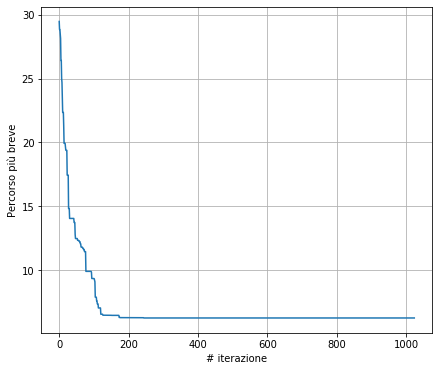

In [17]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/SmallestPath_cerchio.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y)
plt.xlabel('# iterazione')
plt.ylabel('Percorso più breve')
plt.grid(True)
plt.show()

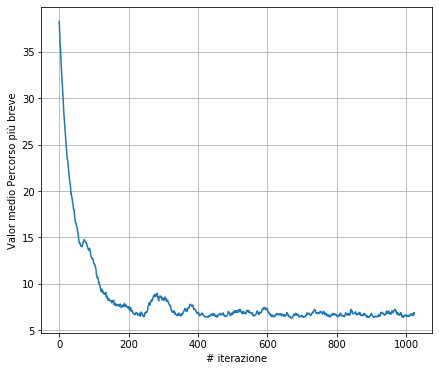

In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/MeanPath_cerchio.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y)
plt.xlabel('# iterazione')
plt.ylabel('Valor medio Percorso più breve')
plt.grid(True)
plt.show()

### Quadrato

Consideriamo il caso in cui le città siano disposte all'interno di un quadrato: produciamo le città

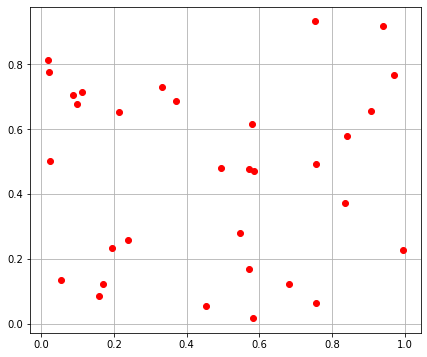

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/cities_quadrato.0", usecols=(1,2), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro')
plt.grid(True)
plt.show()

il percorso più breve che abbiamo trovato è stato questo:

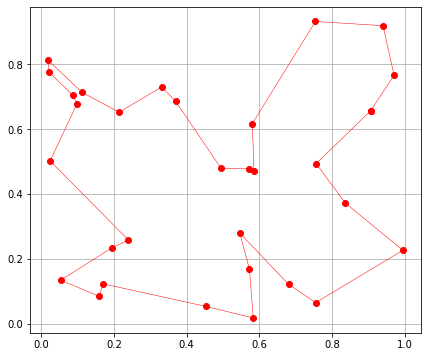

In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/cities_quadrato.final", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y, 'ro',linestyle='-', lw=0.5)
plt.grid(True)
plt.show()

In questo caso è più difficile capire se questo percorso è il più breve tra tutti gli $n!$, nel nostro caso 32! possibili percorsi. L'unico modo per essere più sicuri è utilizzare un altro algoritmo (ad es. simulating annealling) e vedere se i risultati coincidono.

Ora invece plottiamo rispettivamente la lunghezza dei percorsi più brevi in funzione delle generazioni (file 'SmallestPath_quadrato.dat') e il valor medio della lunghezza dei percorsi più brevi in funzione delle generazioni (file 'MeanPath_quadrato.dat') nel caso del quadrato.

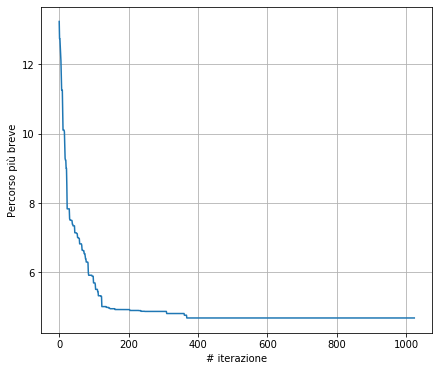

In [8]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/SmallestPath_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y)
plt.xlabel('# iterazione')
plt.ylabel('Percorso più breve')
plt.grid(True)
plt.show()

Dal grafico sovrastante si osserva che intorno a valori della lunghezza del percorso più breve, sull'asse delle x corrispondenti alla iterazione =200, si ha un andamento costante (linea orizzontale). Ciò potrebbe essere indice del fatto che il percorso migliore non sta più cambiando, quindi possiamo essere abbastanza sicuri che quello trovato sia il migliore (vedi andamento dello stesso grafico nel caso del cerchio).
Tuttavia non possiamo avere certezza assoluta di tale risultato.

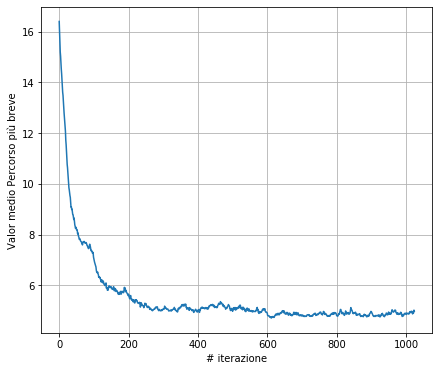

In [9]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [7,6]

x, y = np.loadtxt("ex09.1/MeanPath_quadrato.dat", usecols=(0,1), delimiter=' ', unpack='true')
plt.plot(x,y)
plt.xlabel('# iterazione')
plt.ylabel('Valor medio Percorso più breve')
plt.grid(True)
plt.show()